In [1]:
!pip install mlxtend
! pip install xlrd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [16]:
#Onion, Sausages, Cheese, Water, Butter, Sugar, Eggs
#Onion, Sausages, Cheese, Water, Butter, Sugar, Eggs
df = [['Onion', 'Sausages', 'Cheese', 'Butter'],
      ['Onion', 'Sausages', 'Water', 'Sugar'],
      ['Onion', 'Water', 'Sausages'],
      ['Butter', 'Sugar', 'Eggs'],
      ['Butter', 'Sugar', 'Eggs', 'Cheese'],
      ['Water', 'Cheese', 'Eggs'],
      ['Water', 'Butter'],
      ['Onion', 'Butter', 'Sugar'],
      ['Onion', 'Butter', 'Cheese'],
      ['Onion', 'Butter', 'Water'],
      ]



In [17]:
df = pd.DataFrame(df)
df

,0,1,2,3
0,Onion,Sausages,Cheese,Butter
1,Onion,Sausages,Water,Sugar
2,Onion,Water,Sausages,None
3,Butter,Sugar,Eggs,None
4,Butter,Sugar,Eggs,Cheese
5,Water,Cheese,Eggs,None
6,Water,Butter,None,None
7,Onion,Butter,Sugar,None
8,Onion,Butter,Cheese,None
9,Onion,Butter,Water,None


In [18]:
#conversion in list: the issue of None values
df = df.values.tolist()
df
[['Onion', 'Sausages', 'Cheese', 'Butter'],
 ['Onion', 'Sausages', 'Water', 'Sugar'],
 ['Onion', 'Water', 'Sausages', None],
 ['Butter', 'Sugar', 'Eggs', None],
 ['Butter', 'Sugar', 'Eggs', 'Cheese'],
 ['Water', 'Cheese', 'Eggs', None],
 ['Water', 'Butter', None, None],
 ['Onion', 'Butter', 'Sugar', None],
 ['Onion', 'Butter', 'Cheese', None],
 ['Onion', 'Butter', 'Water', None]]


[['Onion', 'Sausages', 'Cheese', 'Butter'],
 ['Onion', 'Sausages', 'Water', 'Sugar'],
 ['Onion', 'Water', 'Sausages', None],
 ['Butter', 'Sugar', 'Eggs', None],
 ['Butter', 'Sugar', 'Eggs', 'Cheese'],
 ['Water', 'Cheese', 'Eggs', None],
 ['Water', 'Butter', None, None],
 ['Onion', 'Butter', 'Sugar', None],
 ['Onion', 'Butter', 'Cheese', None],
 ['Onion', 'Butter', 'Water', None]]

In [19]:
#Removing None values in list, 2 dimensions
df_ = list()
for _ in df:
  #using list comprehension 
  _ = [x for x in _ if x is not None]
  df_.append(_)
df = df_
df
[['Onion', 'Sausages', 'Cheese', 'Butter'],
 ['Onion', 'Sausages', 'Water', 'Sugar'],
 ['Onion', 'Water', 'Sausages'],
 ['Butter', 'Sugar', 'Eggs'],
 ['Butter', 'Sugar', 'Eggs', 'Cheese'],
 ['Water', 'Cheese', 'Eggs'],
 ['Water', 'Butter'],
 ['Onion', 'Butter', 'Sugar'],
 ['Onion', 'Butter', 'Cheese'],
 ['Onion', 'Butter', 'Water']]



[['Onion', 'Sausages', 'Cheese', 'Butter'],
 ['Onion', 'Sausages', 'Water', 'Sugar'],
 ['Onion', 'Water', 'Sausages'],
 ['Butter', 'Sugar', 'Eggs'],
 ['Butter', 'Sugar', 'Eggs', 'Cheese'],
 ['Water', 'Cheese', 'Eggs'],
 ['Water', 'Butter'],
 ['Onion', 'Butter', 'Sugar'],
 ['Onion', 'Butter', 'Cheese'],
 ['Onion', 'Butter', 'Water']]

In [20]:
#one_hot encoding (boolean output)
te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
df = pd.DataFrame(te_ary, columns=te.columns_)
df


,Butter,Cheese,Eggs,Onion,Sausages,Sugar,Water
0,True,True,False,True,True,False,False
1,False,False,False,True,True,True,True
2,False,False,False,True,True,False,True
3,True,False,True,False,False,True,False
4,True,True,True,False,False,True,False
5,False,True,True,False,False,False,True
6,True,False,False,False,False,False,True
7,True,False,False,True,False,True,False
8,True,True,False,True,False,False,False
9,True,False,False,True,False,False,True


In [21]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

frequent_itemsets


,support,itemsets
0,0.7,(Butter)
1,0.4,(Cheese)
2,0.6,(Onion)
3,0.4,(Sugar)
4,0.5,(Water)
5,0.4,"(Butter, Onion)"


In [24]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Butter),(Onion),0.7,0.6,0.4,0.571429,0.952381,-0.02,0.933333
1,(Onion),(Butter),0.6,0.7,0.4,0.666667,0.952381,-0.02,0.900000


In [27]:
rules=association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Butter),(Onion),0.7,0.6,0.4,0.571429,0.952381,-0.02,0.933333
1,(Onion),(Butter),0.6,0.7,0.4,0.666667,0.952381,-0.02,0.900000


In [28]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))

In [29]:
rules[ (rules['antecedent_len'] >= 1) &
       (rules['confidence'] > 0.6) &
       (rules['lift'] > 0.9) ]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
1,(Onion),(Butter),0.6,0.7,0.4,0.666667,0.952381,-0.02,0.9,1


In [30]:
#select the ones you want
rules[rules['antecedents'] == {'Onion'}]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
1,(Onion),(Butter),0.6,0.7,0.4,0.666667,0.952381,-0.02,0.9,1


In [4]:
#Example 2 FP Growth
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [35]:
%pip install mlxtend --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.1 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [6]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df, min_support=0.6)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,1.0,(5)
1,0.8,(3)
2,0.6,(10)
3,0.6,(8)
4,0.6,(6)
5,0.8,"(3, 5)"
6,0.6,"(10, 5)"
7,0.6,"(8, 3)"
8,0.6,"(8, 5)"
9,0.6,"(8, 3, 5)"


In [7]:
f_itemsets=fpgrowth(df, min_support=0.6, use_colnames=True)
f_itemsets


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Yogurt, Kidney Beans)"
7,0.6,"(Eggs, Onion)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Eggs, Onion, Kidney Beans)"


In [8]:
#Create association rules
from mlxtend.frequent_patterns import association_rules
rules=association_rules(f_itemsets, metric="confidence", min_threshold=0.6)
rules


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf,0.0
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0,0.0
2,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf,0.0
3,(Kidney Beans),(Yogurt),1.0,0.6,0.6,0.60,1.00,0.00,1.0,0.0
4,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0
5,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5
6,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf,0.0
7,(Kidney Beans),(Onion),1.0,0.6,0.6,0.60,1.00,0.00,1.0,0.0
8,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf,0.0
9,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0


In [9]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
10,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.5,2
9,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.0,2
8,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf,0.0,2


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='consequents_', ylabel='antecedents_'>

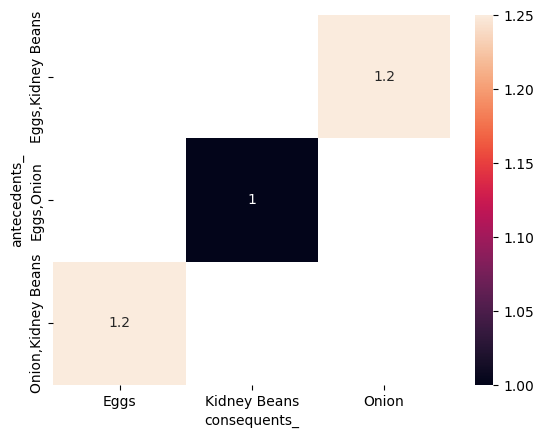

In [10]:
import seaborn as sns
# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)


